# Chapter 3 Multiple Linear Regression

edition 2
特征数据归一化

可视化损失值

多元线性回归

## 导入相关库 

In [1]:
###Boston房价预测模型
#导入模块

%matplotlib notebook 
import tensorflow as tf 
import pandas as pd 
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

## 通过pandas导入数据 

In [2]:

#读取数据文件

df = pd.read_csv("F:\Jupyter/tensorflow/MLR/data/boston.csv",header = 0)

#显示数据摘要描述信息
print(df.describe())


             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

## 数据准备

In [3]:
#获取df的值
df = df.values

print(df)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 7.8800e+00 1.1900e+01]]


In [4]:
#把 values格式转换成numpy的数组

df = np.array(df)
print(df)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 7.8800e+00 1.1900e+01]]


## 数据特征归一化

In [5]:
# 对特征数据【0到11】列做（0-1）的归一化

for i in range(12):
    df[:, i] = (df[:, i] - df[:,i].min()) /(df[:, i].max() - df[:, i].min())

In [6]:
# x_data 为前12列的特征数据

x_data = df[:,:12]
# y_data 为最后一列标签数据
y_data = df[:,12]

## 模型建立

### 定义特征数据和标签数据的占位符

In [7]:
#12个特征数据（12列）None表示行数不定，列数为12

x = tf.placeholder(tf.float32, [None, 12], name = "X")

#1个标签数据
y = tf.placeholder(tf.float32, [None, 1], name = "Y")

### 定义模型函数

In [8]:
#定义一个命名空间
with tf.name_scope("Model"):
    w = tf.Variable(tf.random_normal([12, 1], stddev = 0.01), name = "W")
    b = tf.Variable(1.0, name = "b")
    def model(x,w,b):
        return tf.matmul(x, w) + b
    pred = model(x, w, b)
    
    
    
#给模型下的语句定义了一个命名空间，相当于打包在一起，计算图中会显示一个节点


## 3 训练模型 

### 设置模型训练超参数 

In [9]:
train_epochs = 100
learning_rate = 0.005

### 定义损失函数&优化器

In [10]:
with tf.name_scope("LossFunction"):
    loss_function = tf.reduce_mean(tf.pow(y-pred, 2))
    
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

In [11]:
###定义会话，初始化变量

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

### 迭代训练

In [12]:
#定义一个损失值的列表

loss_list1 = []
loss_list2 = []    #用两种不同给的绘图方式绘制loss图
for epoch in range(train_epochs):
    loss_sum = 0.0
    for xs, ys in zip(x_data, y_data):
        xs = xs.reshape(1 ,12)
        ys = ys.reshape(1, 1)
        
        _, loss = sess.run([optimizer, loss_function], feed_dict={x: xs,y: ys})
        loss_sum = loss_sum + loss
        loss_average = loss_sum/len(y_data)
        loss_list2.append(loss_average)
    x_data,y_data = shuffle(x_data, y_data)
    
    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    loss_average = loss_sum/len(y_data)
    
    #每轮添加一次loss值
    loss_list1.append(loss_average)
    print("epoch=", epoch+1, "loss=", loss_average, "b=", b0temp, "w=", w0temp)
    

epoch= 1 loss= 81.26048472025823 b= 10.249578 w= [[-0.7001266 ]
 [ 2.6718853 ]
 [ 0.18922685]
 [ 0.5867052 ]
 [ 0.6208179 ]
 [ 7.662357  ]
 [ 3.1711674 ]
 [ 3.3973598 ]
 [-0.27552682]
 [-0.06341455]
 [ 2.4206707 ]
 [-1.6416581 ]]
epoch= 2 loss= 59.94790781242992 b= 14.845072 w= [[-1.5264143 ]
 [ 4.8984013 ]
 [-1.0399162 ]
 [ 2.4804533 ]
 [-0.24199374]
 [12.850973  ]
 [ 3.2540367 ]
 [ 4.9230423 ]
 [-1.8143169 ]
 [-1.9493806 ]
 [ 1.1728215 ]
 [-4.7254777 ]]
epoch= 3 loss= 43.57626297891638 b= 15.98491 w= [[-2.0048823 ]
 [ 5.2759557 ]
 [-1.626515  ]
 [ 3.4038215 ]
 [-0.5653854 ]
 [15.355067  ]
 [ 2.8690858 ]
 [ 4.3980036 ]
 [-2.074966  ]
 [-2.8627174 ]
 [-0.66746855]
 [-7.2317004 ]]
epoch= 4 loss= 37.67905043822708 b= 16.56112 w= [[-2.2711718 ]
 [ 5.1607766 ]
 [-1.7773132 ]
 [ 3.879559  ]
 [-0.64371413]
 [17.04473   ]
 [ 2.6546233 ]
 [ 3.4547925 ]
 [-1.5842745 ]
 [-3.0962338 ]
 [-2.028522  ]
 [-9.083547  ]]
epoch= 5 loss= 34.16128759570337 b= 17.3955 w= [[ -2.455729 ]
 [  4.967159 ]
 [ -1

epoch= 36 loss= 23.98607677587788 b= 24.489225 w= [[ -6.5196757 ]
 [  3.1732805 ]
 [  0.26614657]
 [  2.9823225 ]
 [ -5.5729027 ]
 [ 23.593853  ]
 [  0.910082  ]
 [ -9.901197  ]
 [  4.3277497 ]
 [ -5.1524634 ]
 [ -7.693154  ]
 [-19.082714  ]]
epoch= 37 loss= 23.772910163042045 b= 24.963005 w= [[ -6.626717  ]
 [  3.3184524 ]
 [  0.31530762]
 [  3.0023954 ]
 [ -5.633935  ]
 [ 23.723066  ]
 [  1.0778501 ]
 [ -9.95224   ]
 [  4.310242  ]
 [ -5.216629  ]
 [ -7.594137  ]
 [-19.028263  ]]
epoch= 38 loss= 23.898487524754096 b= 24.850626 w= [[ -6.6899157 ]
 [  3.2740188 ]
 [  0.3362621 ]
 [  2.9862413 ]
 [ -5.747526  ]
 [ 23.508337  ]
 [  0.94387025]
 [-10.2468195 ]
 [  4.470825  ]
 [ -5.2040005 ]
 [ -7.7098746 ]
 [-19.068262  ]]
epoch= 39 loss= 23.74433400939804 b= 24.930521 w= [[ -6.7983813 ]
 [  3.3163767 ]
 [  0.24398422]
 [  2.9414177 ]
 [ -5.923817  ]
 [ 23.432163  ]
 [  0.83319557]
 [-10.375271  ]
 [  4.418456  ]
 [ -5.3954563 ]
 [ -7.792485  ]
 [-19.152472  ]]
epoch= 40 loss= 23.5240335

epoch= 70 loss= 23.04035523418415 b= 28.105125 w= [[ -8.695217 ]
 [  3.9846606]
 [  0.7461587]
 [  2.9025466]
 [ -7.6409574]
 [ 21.627234 ]
 [  0.8460705]
 [-13.722316 ]
 [  5.9263873]
 [ -5.8628397]
 [ -8.038054 ]
 [-19.25991  ]]
epoch= 71 loss= 23.326254067842534 b= 28.201542 w= [[ -8.781107 ]
 [  4.091367 ]
 [  0.6643923]
 [  2.9153872]
 [ -7.7921247]
 [ 21.624352 ]
 [  0.7248161]
 [-13.69708  ]
 [  5.785462 ]
 [ -6.0216675]
 [ -8.090793 ]
 [-19.339712 ]]
epoch= 72 loss= 23.20851417234548 b= 28.326822 w= [[ -8.843924  ]
 [  4.1706266 ]
 [  0.62902504]
 [  2.8928092 ]
 [ -7.8929043 ]
 [ 21.603098  ]
 [  0.6708323 ]
 [-13.694761  ]
 [  5.6992946 ]
 [ -6.09679   ]
 [ -8.090135  ]
 [-19.319725  ]]
epoch= 73 loss= 23.154796217221502 b= 28.112804 w= [[ -8.868078 ]
 [  4.104119 ]
 [  0.5497326]
 [  2.840217 ]
 [ -7.9659767]
 [ 21.394432 ]
 [  0.5704502]
 [-13.881436 ]
 [  5.7518826]
 [ -6.128964 ]
 [ -8.203921 ]
 [-19.402903 ]]
epoch= 74 loss= 23.26292569523438 b= 28.125805 w= [[ -8.950711

##  模型预测结果

<IPython.core.display.Javascript object>


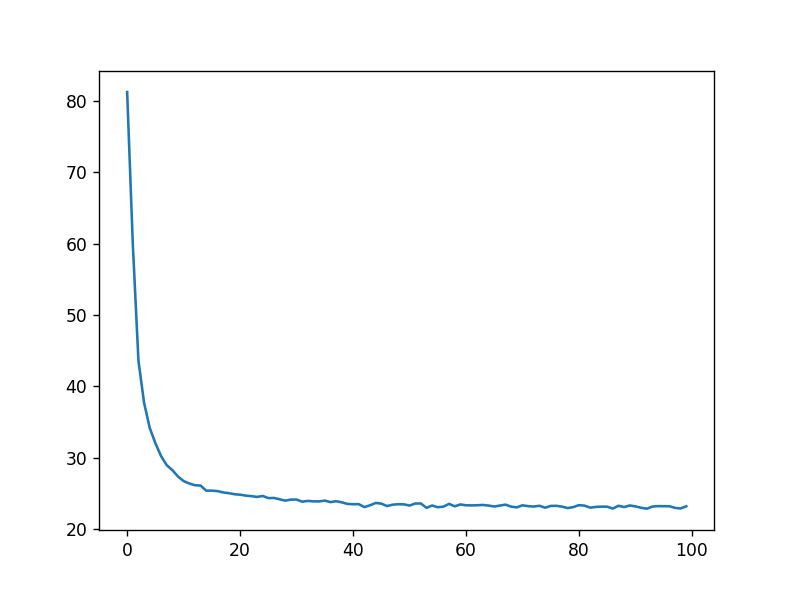

In [21]:
plt.plot(loss_list1)

<IPython.core.display.Javascript object>


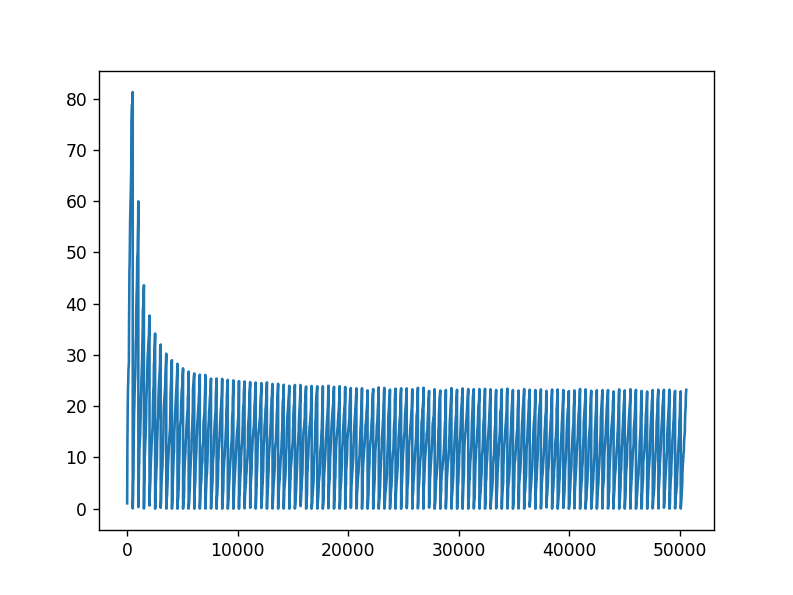

In [22]:
plt.plot(loss_list2)

In [14]:
n = np.random.randint(506) #随机选择一组数据来验证
print(n)
x_test = x_data[n]

x_test = x_test.reshape(1,12)     #此处的x_test一定不能为x_data，
                                  #每次x_data进行一次x_data[n]的操作后，
                                  #会成为一个一行12列的数组
predict = sess.run(pred, feed_dict={x:x_test})

print("预测值：%f" %predict)
target = y_data[n]
print("实际值：%f" %target)

error = abs(predict-target)/target
print("误差：%f" %error)

456
预测值：32.278442
实际值：31.500000
误差：0.024712
